In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#namba
import numba

In [3]:
kb=1.38e-23;
hbar=6.63e-34/np.pi/2;
omegaSN=2*np.pi*0.057;

@numba.jit
def SFQG(f,omegam,Lambda):
    omega=2*np.pi*f
    return (omega**2-omegam**2)**2/(Lambda**2*omegam**2)+Lambda**2/(omegam**2)

@numba.jit
def SFth(T,omegam,Qm):
    return 4*kb*T/(hbar*omegam*Qm)

@numba.jit
def SFSN(omegam,Lambda):
    omegaQ=np.sqrt(omegam**2+omegaSN**2)
    return 2*Lambda**2*omegaSN**2/omegam**2/(omegaQ**2+np.sqrt(Lambda**4+omegaQ**4))

@numba.jit
def SFbase(f,omegam,Lambda,T,Qm):
    return SFQG(f,omegam,Lambda)+SFth(T,omegam,Qm)

omegamx=2*np.pi*1e-2;
omegaQx=np.sqrt(omegamx**2+omegaSN**2)
Lambdax=2*omegaQx;
Tx=1e-3;
Tobsx=1e4;
Qmx=1e7;
flist=np.linspace(1e-3,1,2000);
df=flist[1]-flist[0]
#makd SFlist
SFSNlist=[]
SFthlist=[]
SFQGlist=[]
for f in flist:
    SFQGlist.append(SFQG(f,omegamx,Lambdax))
    SFSNlist.append(SFSN(omegamx,Lambdax))
    SFthlist.append(SFth(Tx,omegamx,Qmx))
SFSNlist=np.array(SFSNlist)
SFthlist=np.array(SFthlist)
SFQGlist=np.array(SFQGlist)
intlist=np.sqrt(1/flist/Tobsx)

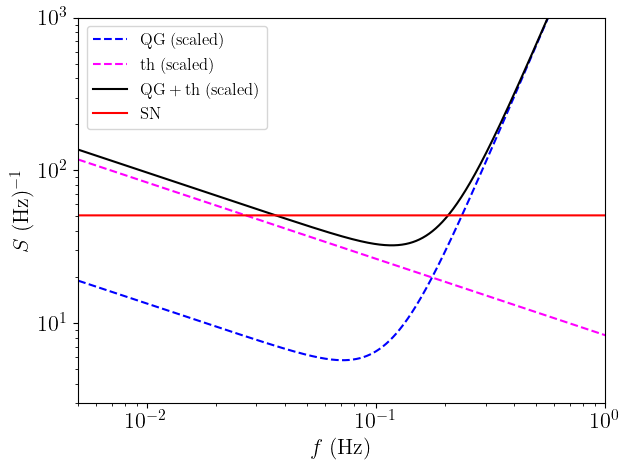

In [ ]:
# #use latex
# plt.rc('text', usetex=True)
# plt.plot(flist,SFQGlist*intlist,'blue',linestyle='dashed',label='${\\rm QG\; (scaled)}$')
# plt.plot(flist,SFthlist*intlist,'magenta',linestyle='dashed',label='${\\rm th\; (scaled)}$')
# plt.plot(flist,(SFthlist+SFQGlist)*intlist,'black',label='${\\rm QG+th\; (scaled)}$')
# plt.plot(flist,SFSNlist,'r',label='{\\rm SN}')
# plt.ylim(3,1e3)
# plt.xlim(5e-3,1)
# plt.xscale('log')
# plt.yscale('log')
# #increase tick font size
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.legend(fontsize=12)
# plt.xlabel(r'$f\;({\rm Hz})$',fontsize=16)
# plt.ylabel(r'$S\; ({\rm Hz})^{-1}$',fontsize=16)
# #make sure not cut
# plt.tight_layout()
# #this is figure 5 of th paper
# plt.savefig('Sfnodelay.pdf')

In [4]:
def FOM(Lambda,omegam,Qm,Tm,Tobs):
    flist=np.linspace(1e-3,1,2000);
    df=flist[1]-flist[0];
    SFSNlist=[]
    SFthlist=[]
    SFQGlist=[]
    for f in flist:
        SFQGlist.append(SFQG(f,omegam,Lambda))
        SFSNlist.append(SFSN(omegam,Lambda))
        SFthlist.append(SFth(Tm,omegam,Qm))
    SFSNlist=np.array(SFSNlist)
    SFthlist=np.array(SFthlist)
    SFQGlist=np.array(SFQGlist)
    return np.sum(SFSNlist**2/(SFthlist+SFQGlist)**2*df*Tobs)


In [570]:
[FOM(1,2*np.pi*1e-2,1e7,1e-3,2e4)/FOM(1,2*np.pi*1e-2,1e7,1e-3,1e4),
 FOM(1,2*np.pi*1e-2,1e7,2e-3,1e4)/FOM(1,2*np.pi*1e-2,1e7,1e-3,1e4),
 FOM(1,2*np.pi*1e-2,0.5e7,1e-3,1e4)/FOM(1,2*np.pi*1e-2,1e7,1e-3,1e4)]

[2.0, 0.3694060454132625, 0.3694060454132625]

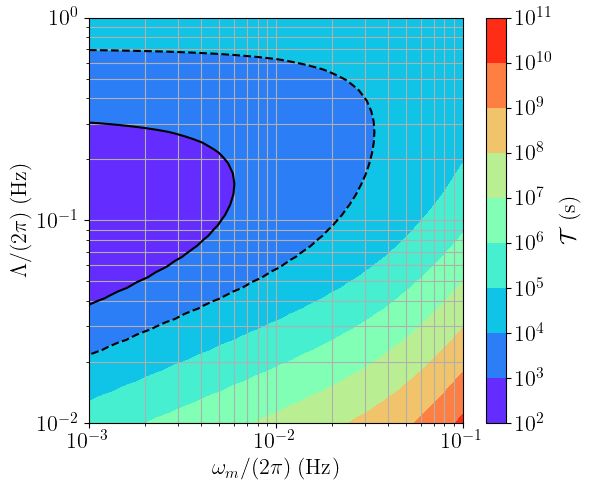

In [17]:
omegamlist=2*np.pi*np.logspace(-3,-1,40);
Lambdalist=2*np.pi*np.logspace(-2,0,40)
#2-D contour plot of FOM
Tobslist=[]
for omegam in omegamlist:
    thislist=[];
    for Lambda in Lambdalist:
        thislist.append(1e4/FOM(Lambda,omegam,1e7,0.001,1e4))
    Tobslist.append(thislist)
Tobslist=np.array(Tobslist)
Tobslist=Tobslist.T

plt.figure(figsize=(6,5))
plt.rc('text', usetex=True)

plt.contourf(omegamlist/np.pi/2,Lambdalist/2/np.pi,Tobslist,levels=20, norm=LogNorm(), cmap='rainbow')
#increase colorbar font size
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=16)   
#colorbar label
cbar.set_label(r'$\mathcal{T}\;({\rm s})$',fontsize=16)

#draw contour levels 0.1, 1 and 10
#put text labels on the contour lines
contour = plt.contour(omegamlist/np.pi/2,Lambdalist/2/np.pi,Tobslist,levels=[1000],
                      colors='black',linestyles='solid')
contour = plt.contour(omegamlist/np.pi/2,Lambdalist/2/np.pi,Tobslist,levels=[10000],
                      colors='black',linestyles='dashed')

#increase tick font size    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\omega_m/(2\pi)\;({\rm Hz})$',fontsize=16)
plt.ylabel(r'$\Lambda/(2\pi)\;({\rm Hz})$',fontsize=16)
plt.xscale('log')
plt.yscale('log')
#make sure not cut
plt.tight_layout()
#grids
#also at minor ticks
#this is figure 6 of the paper
plt.grid(which='both')
plt.savefig('FOM_nodelay.pdf')


In [307]:
FOM(2*np.pi*1e-1,2*np.pi*1e-1,1e7,1e-3,1e4)

0.018136012916604573

In [11]:
#compile
@numba.jit
def KKscaled(f,omegam,Lambda,tau):
    omega=2*np.pi*f;
    omegaq=np.sqrt(omegam**2+omegaSN**2);
    beta=np.sqrt(omegaq**2-1j*Lambda**2);
    betac=np.conj(beta);
    term1=betac*omega+omega**2-beta*(betac+omega)-omegam**2+omegaq**2;
    sincp=np.sinc((omega+omegaq)*tau/2)
    sincm=np.sinc((omega-omegaq)*tau/2)
    coeffp = 1j*np.exp(1/2*1j*tau*(omega+omegaq))*tau*(beta+omegaq)*(-betac+omegaq)*omegaSN**2/2/omegaq;
    coeffm = -1j*np.exp(1/2*1j*tau*(omega-omegaq))*tau*(-beta+omegaq)*(betac+omegaq)*omegaSN**2/2/omegaq;
    return coeffp*sincp+coeffm*sincm+term1

@numba.jit
def KKsc_norm(f,omegam,Lambda,tau):
    return np.abs(KKscaled(f,omegam,Lambda,tau))**2/Lambda**2/omegam**2-SFQG(f,omegam,Lambda)

In [12]:
KKsc_norm(1e-3,2*np.pi*1e-2,2*np.pi*1e-2,0.3)

-1.1703376186240884

In [13]:
SFQG(2*np.pi*1e-2,2*np.pi*1e-2,2*np.pi*1e-2)

1481.588621335324

In [14]:

@numba.njit
def curves(omegamx, Lambdax, Tx, Qx, Tobsx, taux):
    flist = np.linspace(1e-3, 20, 8000)
    df = flist[1] - flist[0]
    
    # Pre-allocate arrays
    SFSNlist = np.empty_like(flist)
    SFthlist = np.empty_like(flist)
    SFQGlist = np.empty_like(flist)
    
    # Compute spectral densities
    for i in range(len(flist)):
        f = flist[i]
        SFSNlist[i] = KKsc_norm(f, omegamx, Lambdax, taux)
        SFthlist[i] = SFth(Tx, omegamx, Qx)
        SFQGlist[i] = SFQG(f, omegamx, Lambdax)
    
    # Combined noise
    SFnoiselist = SFthlist + SFQGlist
    
    # Normalization factor
    normlist = np.sqrt(1 / (flist * Tobsx))
    
    # Figure of Merit (FOM)
    FOM = np.sum((SFSNlist**2 / SFnoiselist**2) * df * Tobsx)
    
    return flist, SFSNlist, SFthlist, SFQGlist, SFnoiselist, normlist, FOM

def FOM_delay(omegamx,Lambdax,Tx,Qx,Tobsx,taux):
    flist=np.linspace(1e-3,20,8000);
    df=flist[1]-flist[0]
    #makd SFlist
    SFSNlist=[]
    SFthlist=[]
    SFQGlist=[]
    for f in flist:
        SFQGlist.append(SFQG(f,omegamx,Lambdax))
        SFSNlist.append(KKsc_norm(f,omegamx,Lambdax,taux))
        SFthlist.append(SFth(Tx,omegamx,Qx))
    SFSNlist=np.array(SFSNlist)
    SFthlist=np.array(SFthlist)
    SFQGlist=np.array(SFQGlist)
    SFnoiselist=(SFthlist+SFQGlist)
    normlist=np.sqrt(1/flist/Tobsx)
    FOM=np.sum(SFSNlist**2/(SFthlist+SFQGlist)**2*df*Tobsx)
    return FOM



In [15]:
flist,SNlist0,thlist,QGlist,noiselist,normlist,FOM0= curves(2*np.pi*1e-2,2*2*np.pi*5.7e-2,1e-3,1e7,1e4,0.0)
flist,SNlist1,thlist,QGlist,noiselist,normlist,FOM1= curves(2*np.pi*1e-2,2*2*np.pi*5.7e-2,1e-3,1e7,1e4,0.3)
flist,SNlist2,thlist,QGlist,noiselist,normlist,FOM2= curves(2*np.pi*1e-2,2*2*np.pi*5.7e-2,1e-3,1e7,1e4,0.6)

In [16]:
#use latex
#figure size
plt.figure(figsize=(6,5))
plt.rc('text', usetex=True)
plt.plot(flist,QGlist*normlist,'blue',linestyle='dashed',label='${\\rm QG\; (scaled,\,}\mathcal{T}=10^4\,{\\rm s})$')
plt.plot(flist,thlist*normlist,'green',linestyle='dashed',label='${\\rm th\; (scaled,\,}\mathcal{T}=10^4\,{\\rm s})$')
plt.plot(flist,noiselist*normlist,'black',linestyle='dashed',label='${\\rm QG+th\; (scaled,}\,\mathcal{T}=10^4\,{\\rm s})$')
plt.plot(flist,np.abs(SNlist0),'red',label='${\\rm SN}, \\tau=0$',linestyle='solid')
plt.plot(flist,QGlist,'blue',linestyle='solid',label='${\\rm QG}$')

plt.ylim(3,1e4)
plt.xlim(5e-3,1)
plt.xscale('log')
plt.yscale('log')
#increase tick font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.xlabel(r'$f\;({\rm Hz})$',fontsize=16)
plt.ylabel(r'$S_F/(\hbar M\omega_m^2)\quad ({\rm Hz}^{-1})$',fontsize=16)
#make sure not cut
plt.tight_layout()
#show grid lines all ticks
plt.grid(which='both')
plt.savefig('Sfnodelay.pdf')

In [563]:
FOM0,FOM1,FOM2

(4.3050797360768405, 4.454831843824317, 5.275805742064312)

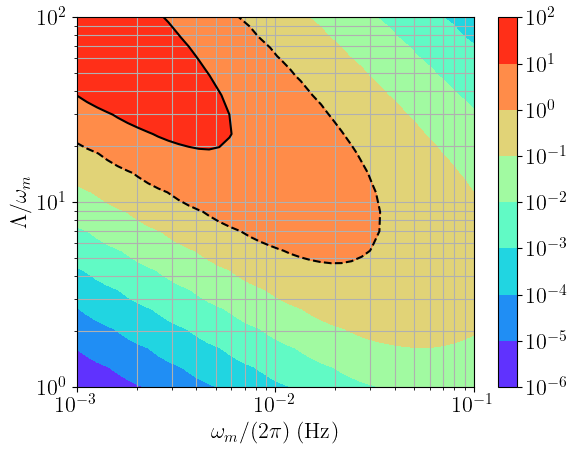

In [564]:
FOMomegamlist=2*np.pi*np.logspace(-3,-1,20);
amplist=np.logspace(0,2,20);
#2-D contour plot of FOM
FOMlist=[]
for omegam in omegamlist:
    thislist=[];
    for amp in amplist:
        thislist.append(FOM_delay(omegam,omegam*amp,0.001,1e7,1e4,0.))
    FOMlist.append(thislist)
FOMlist=np.array(FOMlist)
FOMlist=FOMlist.T
plt.contourf(omegamlist/np.pi/2,amplist,FOMlist,levels=20, norm=LogNorm(), cmap='rainbow')
#increase colorbar font size
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=16)   

#draw contour levels 0.1, 1 and 10
#put text labels on the contour lines
contour = plt.contour(omegamlist/np.pi/2,amplist,FOMlist,levels=[10],
                      colors='black',linestyles='solid')
contour = plt.contour(omegamlist/np.pi/2,amplist,FOMlist,levels=[1],
                      colors='black',linestyles='dashed')

#increase tick font size    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\omega_m/(2\pi)\;({\rm Hz})$',fontsize=16)
plt.ylabel(r'$\Lambda/\omega_m$',fontsize=16)
plt.xscale('log')
plt.yscale('log')
#grids
#also at minor ticks
plt.grid(which='both')
plt.savefig('FOM_nodelay.pdf')

In [316]:
SFSN(2*np.pi*1e-2,2*5.7*np.pi*1e-2)

26.340527216684762

In [317]:
taulist=np.linspace(0,1,20)
FOMlist=[]
for tau in taulist:
    FOMlist.append(FOM_delay(2*np.pi*1e-2,2*2*np.pi*5.7e-2,0.001,1e7,1e4,tau))
plt.plot(taulist,FOMlist)

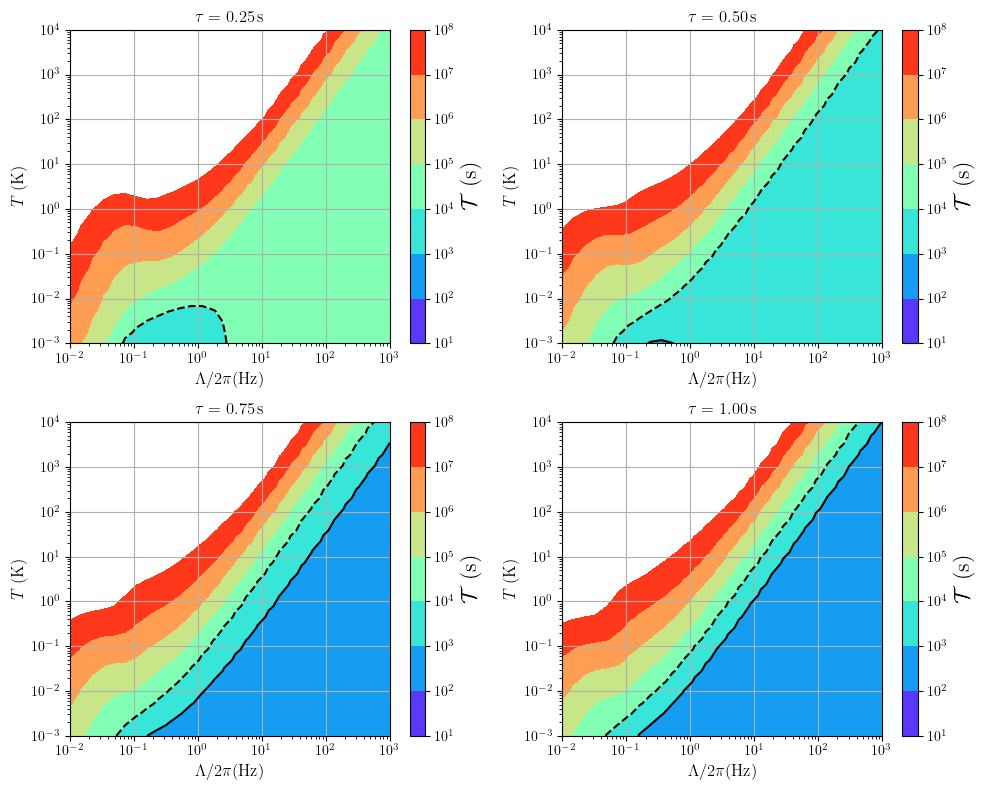

In [19]:
#make some subplots with ax
#set range of contours

fig, ax = plt.subplots(2, 2, figsize=(10,8))
#use latex
plt.rc('text', usetex=True)
taulist=np.linspace(0.25,1,4);
for i in range(4):
    #get 2-d coordinates of the subplot from i
    x=i//2
    y=i%2

    Tlist=np.logspace(-3,4,30);
    Lambdalist=np.logspace(-2,3,30);
    #2-D contour plot of FOM
    FOMlist=[]
    for thislambda in Lambdalist:
        thislist=[];
        for TT in Tlist:
            thislist.append(1e4/FOM_delay(2*np.pi*1e-2,2*np.pi*thislambda,TT,1e7,1e4,taulist[i]))
        FOMlist.append(thislist)
    FOMlist=np.array(FOMlist)
    FOMlist=FOMlist.T
#    ax[x,y].contourf(Lambdalist,Tlist,FOMlist,levels=20, norm=LogNorm(), cmap='rainbow')
    #increase colorbar font size
    #colorbar for this ax[i]
    cbar=ax[x,y].figure.colorbar(ax[x,y].contourf(Lambdalist,Tlist,FOMlist,levels=np.logspace(1,8,8), 
                                                  norm=LogNorm(), cmap='rainbow'))
    cbar.set_label(r'$\mathcal{T}\;({\rm s})$',fontsize=16)

    #draw contour levels 0.1, 1 and 10
    #put text labels on the contour lines
    ax[x,y].contour(Lambdalist,Tlist,FOMlist,levels=[1000],
                        colors='black',linestyles='solid')
    ax[x,y].contour(Lambdalist,Tlist,FOMlist,levels=[10000],
                        colors='black',linestyles='dashed')
    #set log scale
    ax[x,y].set_xscale('log')
    ax[x,y].set_yscale('log')
    #xlabel
    
    ax[x,y].set_xlabel(r'$\Lambda/2\pi ({\rm Hz})$',fontsize=12)
    ax[x,y].set_ylabel(r'$T\;({\rm K})$',fontsize=12)
    #title
    ax[x,y].set_title(r'$\tau=%.2f\,{\rm s}$' % taulist[i],fontsize=12)
    #show grid
    ax[x,y].grid(True)

    #increase tick font size    
plt.tight_layout()
plt.savefig('FOM_delay.pdf')

In [20]:
flist,SNlist0,thlist,QGlist,noiselist,normlist,FOM0= curves(2*np.pi*1e-2,2*np.pi*350,300,3e6,1e4,0.5)
flist,SNlist1,thlist,QGlist,noiselist,normlist,FOM1= curves(2*np.pi*1e-2,2*np.pi*350,300,3e6,1e4,1)


In [22]:
#use latex
#figure size
plt.figure(figsize=(6,5))
plt.rc('text', usetex=True)
plt.plot(flist,QGlist*normlist,'blue',linestyle='dashed',label='${\\rm QG\; (scaled,\,}\mathcal{T}=10^4\,{\\rm s})$')
plt.plot(flist,thlist*normlist,'green',linestyle='dashed',label='${\\rm th\; (scaled,\,}\mathcal{T}=10^4\,{\\rm s})$')
plt.plot(flist,noiselist*normlist,'black',linestyle='dashed',label='${\\rm QG+th\; (scaled,}\,\mathcal{T}=10^4\,{\\rm s})$')
plt.plot(flist,np.abs(SNlist0),'red',label='${\\rm SN}, \\tau=0.5\,{\\rm s}$',linestyle='solid')
plt.plot(flist,np.abs(SNlist1),'purple',label='${\\rm SN}, \\tau=1\,{\\rm s}$',linestyle='solid')

plt.plot(flist,QGlist,'blue',linestyle='solid',label='${\\rm QG}$')

plt.ylim(1e5,2e9)
plt.xlim(5e-3,2)
plt.xscale('log')
plt.yscale('log')
#increase tick font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.xlabel(r'$f\;({\rm Hz})$',fontsize=16)
plt.ylabel(r'$S_F/(\hbar M\omega_m^2)\quad ({\rm Hz}^{-1})$',fontsize=16)
#make sure not cut
plt.tight_layout()
#all grids include minor ticks
plt.grid(which='both')
#make sure not cut
#this is figure 8
plt.tight_layout()
plt.savefig('Sfwithdelay.pdf')

In [567]:
FOM0, FOM1

(1.8178063017193211, 13.453700644210901)